In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#This code sets some default configurations for Matplotlib plots by updating the rcParams dictionary.
plt.rcParams.update(
{"font.size": 10, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False,"axes.spines.top"
: False, "axes.spines.bottom": False,
"xtick.top": False,
"xtick.bottom": False,
"ytick.right": False,
"ytick.left": False,
}
)

# Data Wrangling

TATA Retail Sales Dataset Downloaded from Kaggle's Site

## Data Accessing & Preprocessing

In [3]:
retail_data = pd.read_csv("Online_Retail.csv",encoding="unicode_escape")

In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail_data.shape

(541909, 8)

In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


###  Data Cleaning

In [7]:
retail_data["Description"].isnull().sum()

1454

In [8]:
retail_data.dropna(subset=["Description"],inplace=True)

In [9]:
retail_data["CustomerID"].isnull().sum()

133626

In [10]:
retail_data.dropna(subset=["CustomerID"],inplace=True)

In [11]:
retail_data["CustomerID"].isnull().sum()

0

In [12]:
retail_data["Description"].isnull().sum()

0

In [13]:
np.unique(retail_data["Country"].values)

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

In [14]:
retail_data["Country"].isnull().sum()

0

In [15]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [17]:
retail_data['CustomerID'] = retail_data['CustomerID'].astype("object")

In [18]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [19]:
retail_data.duplicated().sum()

5225

In [20]:
retail_data = retail_data.drop_duplicates()

In [21]:
retail_data.duplicated().sum()

0

In [22]:
#creating a separate column for time
retail_data['Time'] = retail_data['InvoiceDate'].dt.time
#creating a separate column for month
retail_data['Month'] = retail_data['InvoiceDate'].dt.month_name()
#creating a separate column for day name
retail_data['Day'] = retail_data['InvoiceDate'].dt.day_name()
#creating a column for year
retail_data['Year']= retail_data['InvoiceDate'].dt.year

In [23]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
 8   Time         401604 non-null  object        
 9   Month        401604 non-null  object        
 10  Day          401604 non-null  object        
 11  Year         401604 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(8)
memory usage: 38.3+ MB


In [24]:
#creating a column for total
retail_data['Total Amount'] = retail_data['Quantity']*retail_data['UnitPrice']

In [25]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


## Structuring

<Axes: >

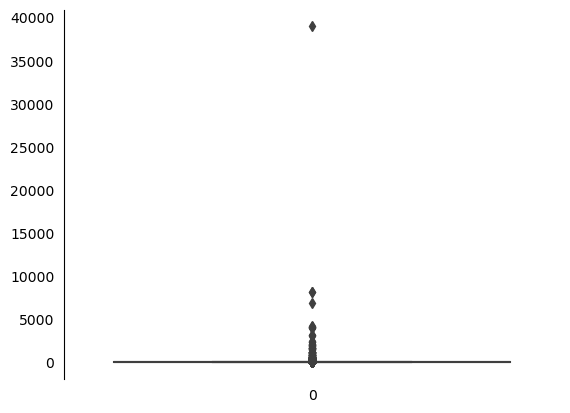

In [26]:
#Check Unit Price `s Distribution
sns.boxplot(retail_data['UnitPrice'])

 It seems that there are values in UnitPrice column which are very much close to 0

In [27]:
retail_data[retail_data['UnitPrice'] < 100].shape[0]

401302

In [28]:
#check the minimum
retail_data['UnitPrice'].min()

0.0

In [29]:
retail_data['UnitPrice'].max()

38970.0

## Now let us also check for Quantity's distribution

<Axes: ylabel='Quantity'>

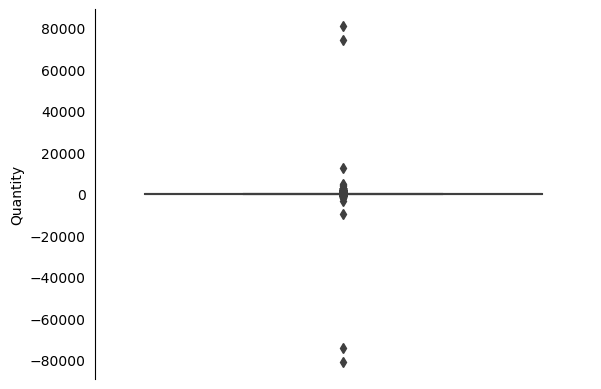

In [30]:
sns.boxplot(y = 'Quantity', data=retail_data)

This means that there are values in column Quantity which are under 0, which happens when there is a cancelled purchase

In [31]:
retail_data[retail_data['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96


In [32]:
retail_data[retail_data['Quantity'] < 0].shape[0]

8872

 Now we can create a separate data frame for cancelled purchases

In [33]:
cancelled_purchases = retail_data[retail_data['Quantity'] < 0]

In [34]:
cancelled_purchases.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96


In [35]:
retail_metadata = retail_data[retail_data['Quantity'] > 0] #we modified our dataframe data to contain only purchased product

In [36]:
retail_metadata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


In [37]:
retail_metadata['Quantity'].min() # check min to confirm for positive quantity

1

# Exploratory Data Analysis (EDA)

In [38]:
retail_data_analysis = retail_data

### 1) What is the total amount of purchases for each customer & which customer has paid the most and less?

In [39]:
# Show top 10 customers, max and min amounts paid   
res_df = retail_data_analysis.groupby('CustomerID')["Total Amount"].sum().reset_index()
res_df.sort_values(by='Total Amount',ascending=False,inplace=True)
res_df

,CustomerID,Total Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187322.17
1895,14911.0,132458.73
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


In [40]:
negative_total_amount = res_df[res_df['Total Amount'] < 0].shape[0]
negative_total_amount

42

In [41]:
final_df = res_df[res_df['Total Amount'] > 0].shape[0]
final_df


4322

In [42]:
print('customer Id {} who paid the maximum amount {}'.format(res_df.loc[res_df['Total Amount'].idxmax()]['CustomerID'],res_df['Total Amount'].max()))
print('customer Id {} who paid the minimum amount {}'.format(res_df.loc[res_df['Total Amount'].idxmin()]['CustomerID'],res_df['Total Amount'].min()))

res_df.head(10)

customer Id 14646.0 who paid the maximum amount 279489.02
customer Id 17448.0 who paid the minimum amount -4287.63


,CustomerID,Total Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187322.17
1895,14911.0,132458.73
55,12415.0,123725.45
1345,14156.0,113214.59
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62690.54
2192,15311.0,59284.19


### 2) Total sales at each country, how many quantites sold at each country 

In [43]:
country_df = retail_metadata.groupby(['Country']).agg({'Quantity':'sum','Total Amount':'sum'}).reset_index()
country_df.sort_values(by='Total Amount',ascending=False,inplace=True)
country_df.head(10)

,Country,Quantity,Total Amount
35,United Kingdom,4254037,7285024.644
23,Netherlands,200937,285446.340
10,EIRE,140383,265262.460
14,Germany,119156,228678.400
13,France,111429,208934.310
0,Australia,84199,138453.810
30,Spain,27944,61558.560
32,Switzerland,30083,56443.950
3,Belgium,23237,41196.340
31,Sweden,36078,38367.830


### 3) How many products have been bought by each customer and who is the customer who has bought the highest and the least number of products?

In [44]:
# show the min and max quantites has sold. 
print('The minimum number of products that has been bought is {} by customer id {} '.format(retail_metadata['Quantity'].min(),retail_metadata.loc[retail_metadata['Quantity'].idxmin()]["CustomerID"]))
print('The maximum number of products that has been bought is {} by customer id {} '.format(retail_metadata['Quantity'].max(),retail_metadata.loc[retail_metadata['Quantity'].idxmax()]["CustomerID"]))

The minimum number of products that has been bought is 1 by customer id 15311.0 
The maximum number of products that has been bought is 80995 by customer id 16446.0 


In [45]:
cus_retail_data = retail_data_analysis[["CustomerID","StockCode"]]
per_cus_retail_data = cus_retail_data.groupby('CustomerID')['StockCode'].count().reset_index()
per_cus_retail_data.sample(30)

,CustomerID,StockCode
231,12626.0,307
394,12840.0,116
206,12599.0,62
1428,14271.0,10
3078,16506.0,3
1595,14501.0,12
2135,15236.0,15
3359,16892.0,99
2533,15763.0,63
3650,17307.0,1


### 4) Average of paid amount by each customer at each country ordered by number of invoices.

In [46]:
avg_cus = retail_metadata[['Quantity','Total Amount','Country','CustomerID','InvoiceNo']].copy()

x = avg_cus.groupby(['Country','CustomerID','InvoiceNo']).sum()

x['Invoices']=1
y = x.groupby('Country').sum()
y['AVG'] = y['Total Amount'] / y['Invoices']
y.sort_values(['Invoices','AVG'],ascending=False,inplace=True)
y.head(10)

,Quantity,Total Amount,Invoices,AVG
Country,,,,
United Kingdom,4254037,7285024.644,16649,437.565298
Germany,119156,228678.400,457,500.390372
France,111429,208934.310,389,537.106195
EIRE,140383,265262.460,260,1020.240231
Belgium,23237,41196.340,98,420.370816
Netherlands,200937,285446.340,95,3004.698316
Spain,27944,61558.560,90,683.984000
Australia,84199,138453.810,57,2429.014211
Portugal,16095,33375.840,57,585.541053


In [47]:
## Average of amount paid by the customers overall countries
cus_amount = avg_cus.groupby(['Country','CustomerID'])['Total Amount'].sum().reset_index()
avg_cus_amount = cus_amount.groupby('Country')['Total Amount'].mean().reset_index()
avg_cus_amount.sort_values('Total Amount',ascending=False).head(15)

,Country,Total Amount
10,EIRE,88420.820000
23,Netherlands,31716.260000
29,Singapore,21279.290000
0,Australia,15383.756667
31,Sweden,4795.978750
19,Japan,4677.046250
16,Iceland,4310.000000
24,Norway,3616.544000
32,Switzerland,2687.807143
14,Germany,2432.748936


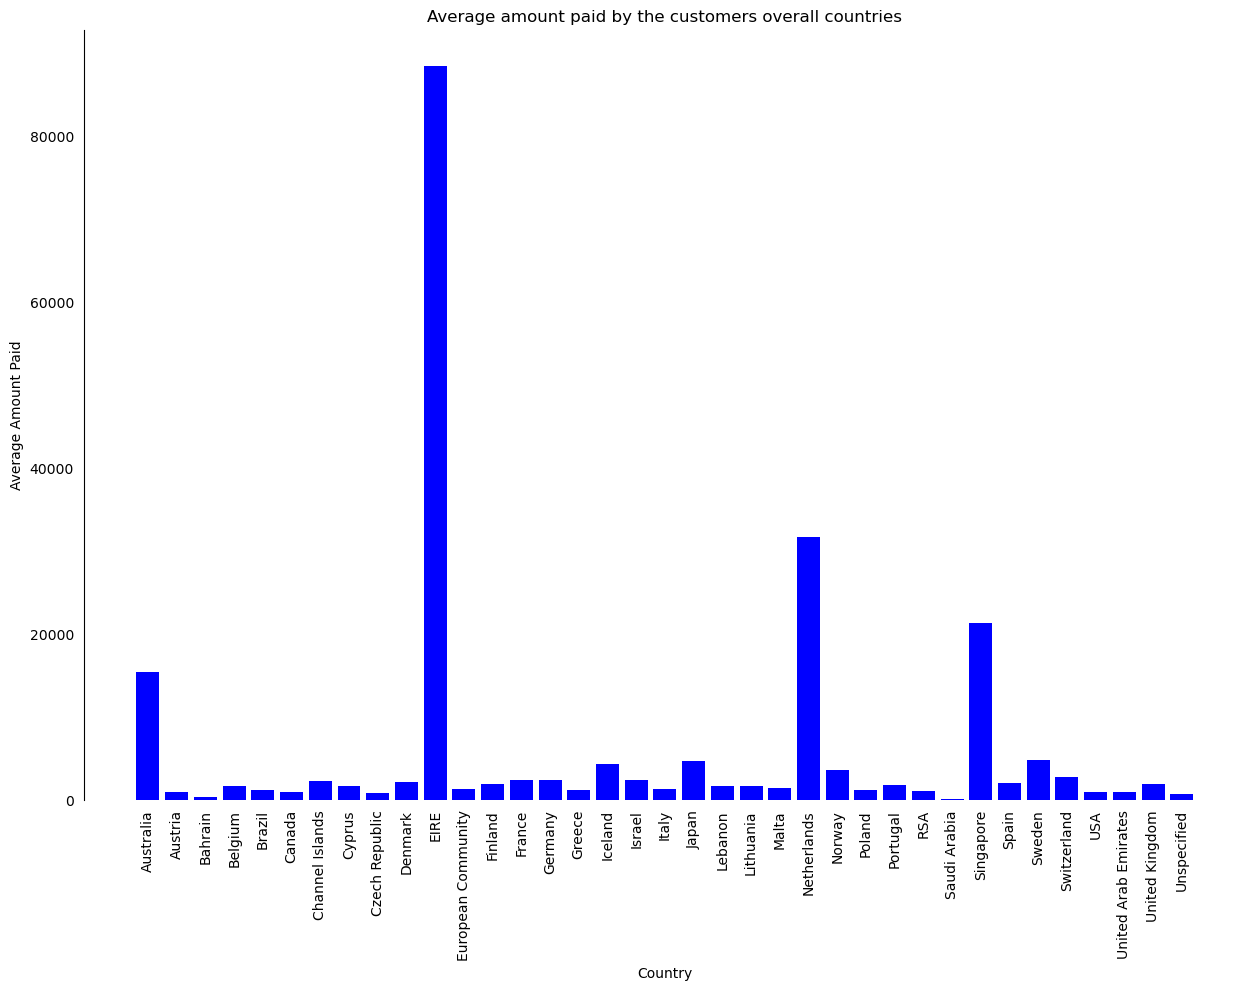

In [48]:
plt.figure(figsize=(15,10))
plt.bar(avg_cus_amount["Country"],avg_cus_amount["Total Amount"],color="blue")
plt.title("Average amount paid by the customers overall countries")
plt.ylabel('Average Amount Paid')
plt.xticks(rotation="vertical")
plt.xlabel('Country')
plt.show()

 We noticed that the highest average amount paid by the customer is in EIRE and lowest amount paid in Saudi Arabia

### 5) Which month has the highest total amount overall countries and at each country also?

In [49]:
modifed_df = retail_data_analysis[['Quantity','Total Amount','Country']].copy()
modifed_df['Month'] = retail_data_analysis[['Month']] 
modifed_df['Year'] = retail_data_analysis[['Year']]  

In [50]:
date_df = modifed_df.groupby(['Year','Month','Country']).agg({'Quantity':'sum','Total Amount':'sum'}).reset_index()
total_values = date_df.sort_values('Total Amount',ascending=False)
total_values

,Year,Month,Country,Quantity,Total Amount
252,2011,November,United Kingdom,570565,950731.450
277,2011,October,United Kingdom,454870,781610.920
297,2011,September,United Kingdom,446556,774620.302
229,2011,May,United Kingdom,295390,524363.880
22,2010,December,United Kingdom,251650,481675.230
...,...,...,...,...,...
201,2011,March,Japan,1,-73.660
76,2011,December,Cyprus,-6,-91.250
129,2011,January,Japan,-45,-109.800
85,2011,December,Japan,-49,-116.930


In [51]:
Country_values = total_values[total_values['Country']=='Australia']
Country_values.sort_values(by='Total Amount',ascending=False)

,Year,Month,Country,Quantity,Total Amount
163,2011,June,Australia,15973,25164.77
49,2011,August,Australia,12570,22489.20
253,2011,October,Australia,7401,17150.53
188,2011,March,Australia,10329,17055.29
94,2011,February,Australia,8659,14627.47
211,2011,May,Australia,9073,13628.51
118,2011,January,Australia,5644,9017.71
231,2011,November,Australia,4205,6805.99
278,2011,September,Australia,4043,5031.73
139,2011,July,Australia,5185,4767.57


In [52]:
max_amount_row = total_values.loc[total_values.groupby('Country')['Total Amount'].idxmax()]
max_amount_row

,Year,Month,Country,Quantity,Total Amount
163,2011,June,Australia,15973,25164.77
189,2011,March,Austria,982,1708.12
213,2011,May,Bahrain,260,548.40
233,2011,November,Belgium,2550,6229.41
26,2011,April,Brazil,356,1143.60
142,2011,July,Canada,1027,1768.58
53,2011,August,Channel Islands,2002,4882.63
257,2011,October,Cyprus,1369,4153.97
99,2011,February,Czech Republic,346,549.26
282,2011,September,Denmark,1608,4570.16


In [53]:
top_countries = max_amount_row['Month'].mode()[0]
print("The Month with the Highest Sales most times across different Countries is :",top_countries)

The Month with the Highest Sales most times across different Countries is : October


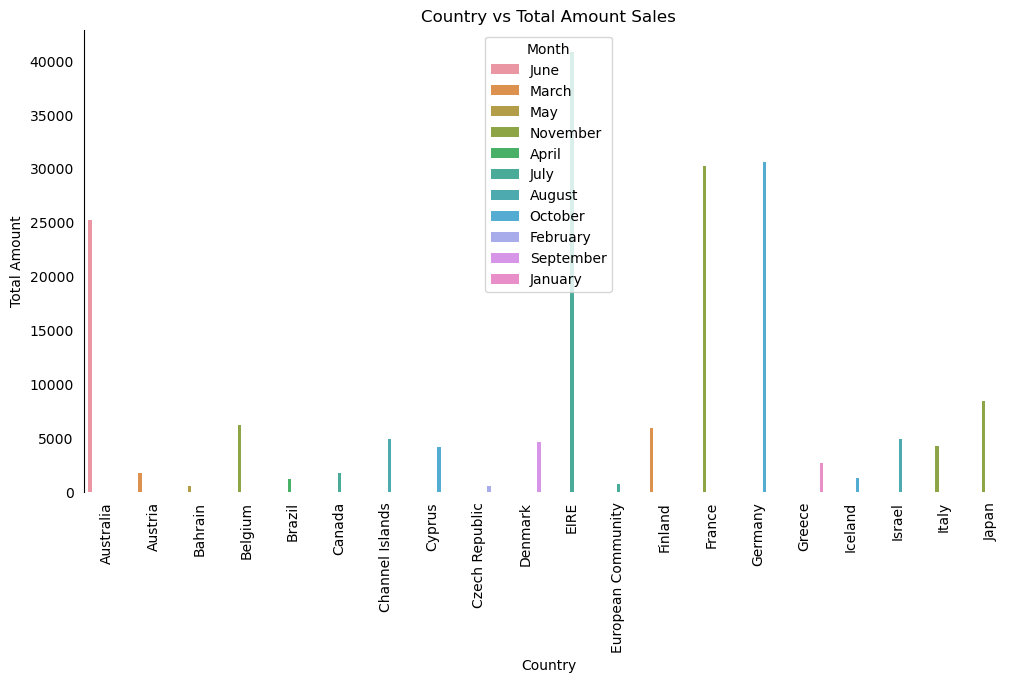

In [54]:
# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(x='Country', y='Total Amount', hue='Month', data=max_amount_row[0:20])
plt.title('Country vs Total Amount Sales')
plt.legend(title='Month')
plt.ylabel('Total Amount')
plt.xlabel('Country')
plt.xticks(rotation='vertical')

plt.show()

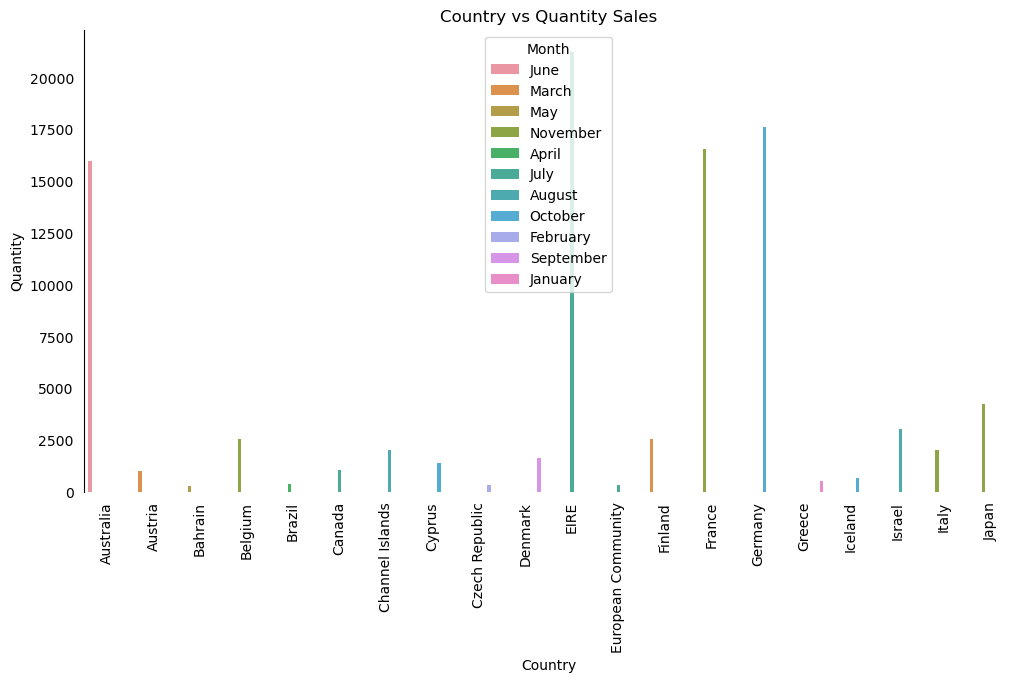

In [55]:
# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(x='Country', y='Quantity', hue='Month', data=max_amount_row[0:20])
plt.title('Country vs Quantity Sales')
plt.legend(title='Month')
plt.ylabel('Quantity')
plt.xlabel('Country')
plt.xticks(rotation='vertical')

plt.show()

### 6)Sales Average of each product at each country at each month.

In [56]:
## Average sales for each product

avg_sales = retail_metadata[['Quantity','Total Amount','Country','Month','StockCode']].copy()

x = avg_sales.groupby(['Country','Month','StockCode']).sum()

x['Avg_Stock_Sales'] = x['Total Amount'] / x.groupby(['Country','Month'])['Quantity'].sum()
x.sort_values(by=['Avg_Stock_Sales'],ascending=False,inplace=True)
x

Quantity  Total Amount  Avg_Stock_Sales
Country     Month     StockCode                                         
Portugal    May       M                 4       3599.40        11.426667
Singapore   October   M                 2       6068.06        10.096606
Cyprus      September 15056N           33        196.35         5.950000
Norway      March     M                 3        840.30         5.386538
Singapore   April     M                 5       6090.84         4.385054
...                                   ...           ...              ...
Germany     December  22841             1          0.00         0.000000
Netherlands August    21786           144          0.00         0.000000
                      22955           144          0.00         0.000000
RSA         October   M                 1          0.00         0.000000
Australia   November  23234           216          0.00         0.000000

[60219 rows x 3 columns]

### 7) Which countries have more customers?

In [57]:
custCountry = retail_data['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts'] # renaming the columns

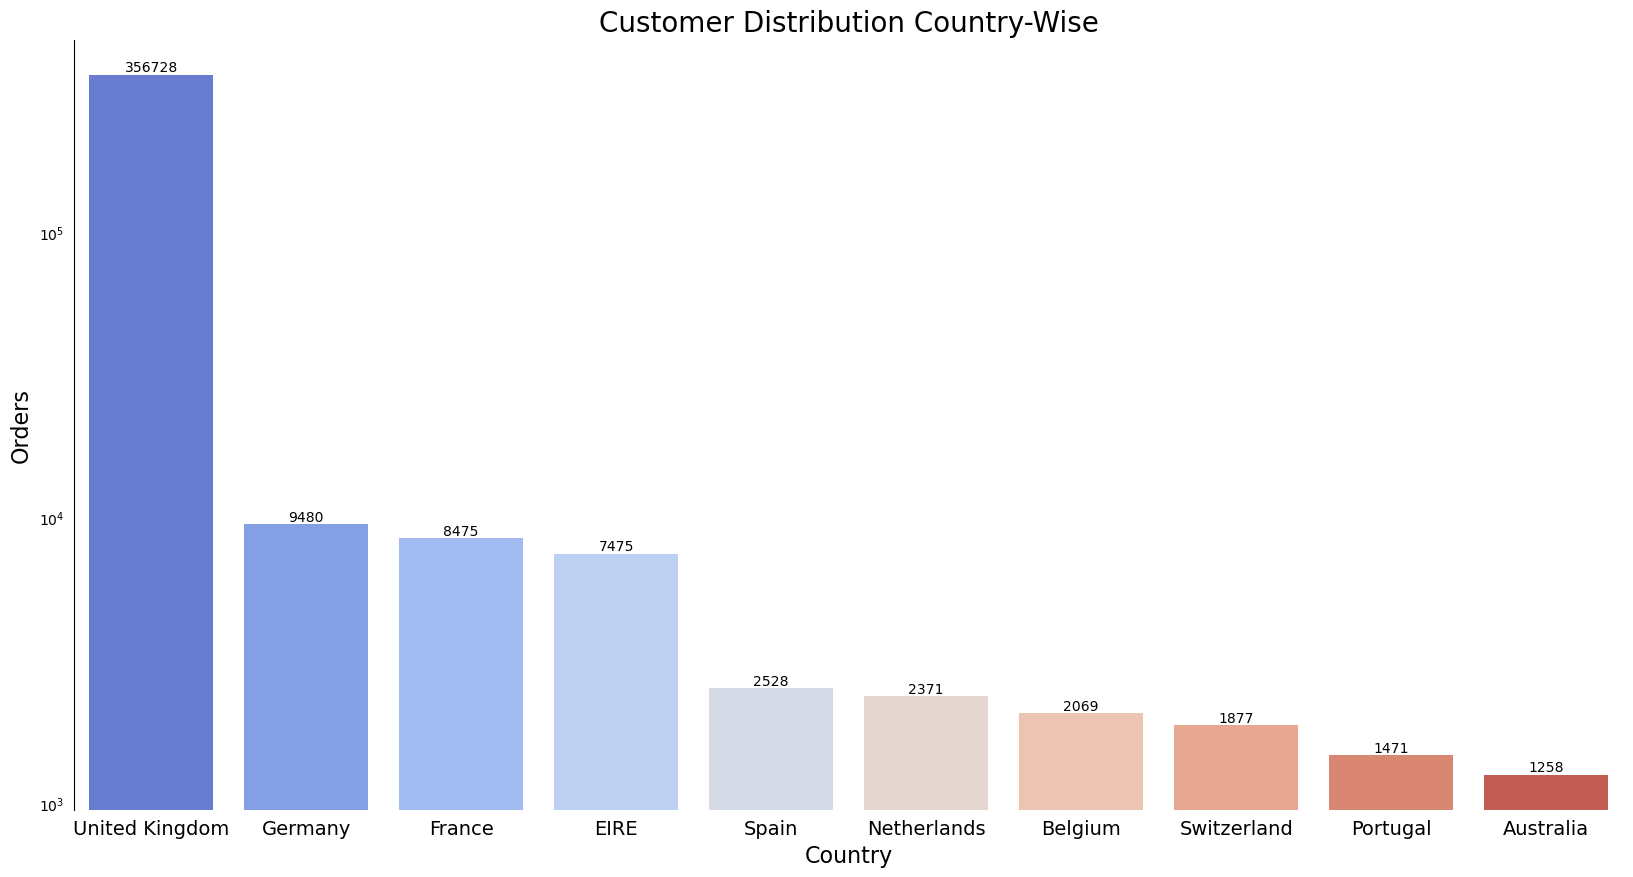

In [58]:
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

### 8) which day has more number of sales?

In [59]:
daySales = retail_data.groupby(['Day'])['StockCode'].count().reset_index()
daySales.sort_values(by='StockCode',ascending=False,inplace=True)
daySales

,Day,StockCode
3,Thursday,81575
5,Wednesday,69753
4,Tuesday,67376
1,Monday,65715
2,Sunday,61673
0,Friday,55512


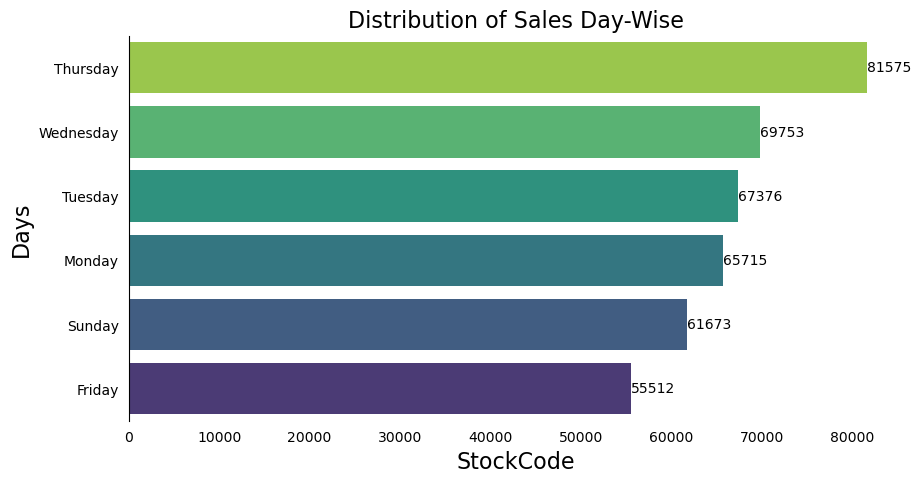

In [60]:
#Choosing Palette and reverse it
Palette = sns.color_palette('viridis')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Day' , x= 'StockCode' , data = daySales, palette = Palette)
#Data labels
ax.bar_label(ax.containers[0])
#Setting Title
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days',fontsize = 16)
plt.xlabel('StockCode',fontsize = 16)
plt.show()

### RMF:

RMF Analysis As a algorithm the RFM was used, for being an easy-to-understand model.

The term RFM comes from the function of three acronyms: Recency, Frequency, and Monetary, seeking to better understand thecustomer and verify when was his last purchase, how many times he has bought and how much he has spent with the company.

Recency(R) Days since the customer's last purchase Frequency(F) Number of products bought by thecustomer Monetarity(M) Totalspent on purchases

### Customer Score:

The customer score ranges from 1 to 5, where the higher this number, the better. This score is assigned for each acronym independently:

The more recent the customer's purchase the higher the Recency (R) score.

The more purchases the customer makes, the higher the Frequency score (F)

The more the customer spends on purchases, the higher the score the customer will have Monetarity(M)

This definition of each score can be given through inference, i.e. some business definition or by quintile

In [61]:
#Ignoring Cancel orders
retail_data[~retail_data['InvoiceNo'].str.contains('C' ,na = False)]
#Dropping Null values in Customer ID column
retail_data= retail_data.dropna(subset= ['CustomerID'])
#Make Checkoutprice Column
retail_data['CheckoutPrice'] = retail_data['UnitPrice'] * retail_data['Quantity']
#Ignoring Debts
retail_data =retail_data[retail_data['UnitPrice']>0]

In [62]:
#Dealing with datatypes
retail_data['CustomerID'] = retail_data['CustomerID'].astype('int64')

In [63]:
import datetime as dt
recent_date = retail_data["InvoiceDate"].max() + dt.timedelta(days=3)
recent_date

Timestamp('2011-12-12 12:50:00')

In [64]:
#Set our data to rfm Analysis
rfm = retail_data.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm.head()

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,328,2,0.00
12347,4,7,4310.00
12348,77,4,1797.24
12349,21,1,1757.55
12350,312,1,334.40


In [65]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [66]:
#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

In [67]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [68]:
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [69]:
#Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [70]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )

In [71]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12347,4,7,4310.00,5,4,5,545
12348,77,4,1797.24,2,3,4,234
12349,21,1,1757.55,4,1,4,414
12350,312,1,334.40,1,1,2,112
12352,38,11,1545.41,3,5,4,354
...,...,...,...,...,...,...,...
18280,280,1,180.60,1,2,1,121
18281,183,1,80.82,1,2,1,121
18282,10,3,176.60,5,3,1,531


Segmentation calculation: The calculation to know which segmentation the customer is in is given by averaging the F and R scores I see that Monetary could be deceptive , So i will segment our customers on Recency and Frequency Scores



In [72]:
#Our Customer Segmentation
seg_map = {
r'[1-2][1-2][1-5]': 'Hibernating',
r'[1-2][3-4][1-5]': 'At risk',
r'[1-2]5[1-5]' :'Cannot lose them',
r'3[1-2][1-5]' : 'About to sleep',
r'33[1-5]' : 'Need Attention',
r'[3-4][4-5][1-5]' : 'Loyal Customers',
r'[4-5][1-3][1-5]' : 'Good Potential',
r'5[4-5][1-5]' : 'Champions',
}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

In [73]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12347,4,7,4310.00,5,4,5,545,Champions
12348,77,4,1797.24,2,3,4,234,At risk
12349,21,1,1757.55,4,1,4,414,Good Potential
12350,312,1,334.40,1,1,2,112,Hibernating
12352,38,11,1545.41,3,5,4,354,Loyal Customers
...,...,...,...,...,...,...,...,...
18280,280,1,180.60,1,2,1,121,Hibernating
18281,183,1,80.82,1,2,1,121,Hibernating
18282,10,3,176.60,5,3,1,531,Good Potential


In [74]:
#Bar Plot for Our segments
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments

,Segment,percentage
0,Hibernating,24.097222
1,Loyal Customers,18.379630
2,Champions,14.791667
3,Good Potential,14.398148
4,At risk,14.120370
5,About to sleep,8.425926
6,Need Attention,4.166667
7,Cannot lose them,1.620370


In [75]:
Segments = Segments.round(1)
Segments

,Segment,percentage
0,Hibernating,24.1
1,Loyal Customers,18.4
2,Champions,14.8
3,Good Potential,14.4
4,At risk,14.1
5,About to sleep,8.4
6,Need Attention,4.2
7,Cannot lose them,1.6


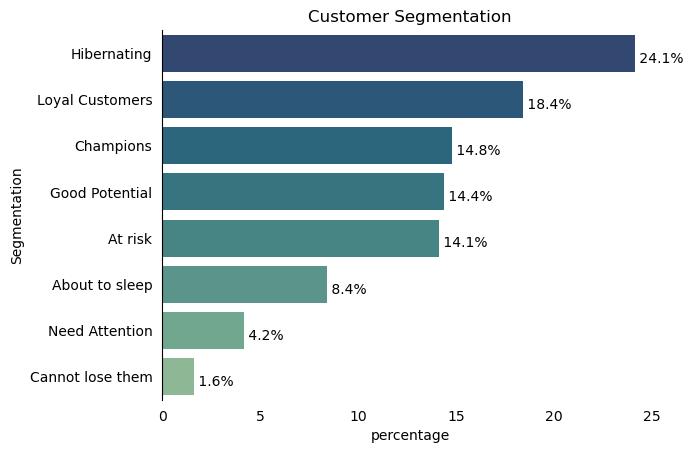

In [76]:
b =sns.barplot(y='Segment',x='percentage', data=Segments, palette = 'crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20," {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

In [77]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12347,4,7,4310.00,5,4,5,545,Champions
12348,77,4,1797.24,2,3,4,234,At risk
12349,21,1,1757.55,4,1,4,414,Good Potential
12350,312,1,334.40,1,1,2,112,Hibernating
12352,38,11,1545.41,3,5,4,354,Loyal Customers
...,...,...,...,...,...,...,...,...
18280,280,1,180.60,1,2,1,121,Hibernating
18281,183,1,80.82,1,2,1,121,Hibernating
18282,10,3,176.60,5,3,1,531,Good Potential


### Findings

24.1% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time

18.4% of our customers are loyal and usually buys from us

14.8% of our customers are champions so we are their favourtie market

14.4% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times

14.1% of our cutomeers are at risk segment so we must attract them again

8.4% of our customers are about to sleep and this segment of customers who last purchase from us for a fairly long time

4.2% of our customers are needing more attention to make them fall under Champions segment

1.6% of our customers can`t lost them and they purchased from us many times but last time was for a long time



## Data Visualization

### Countplot

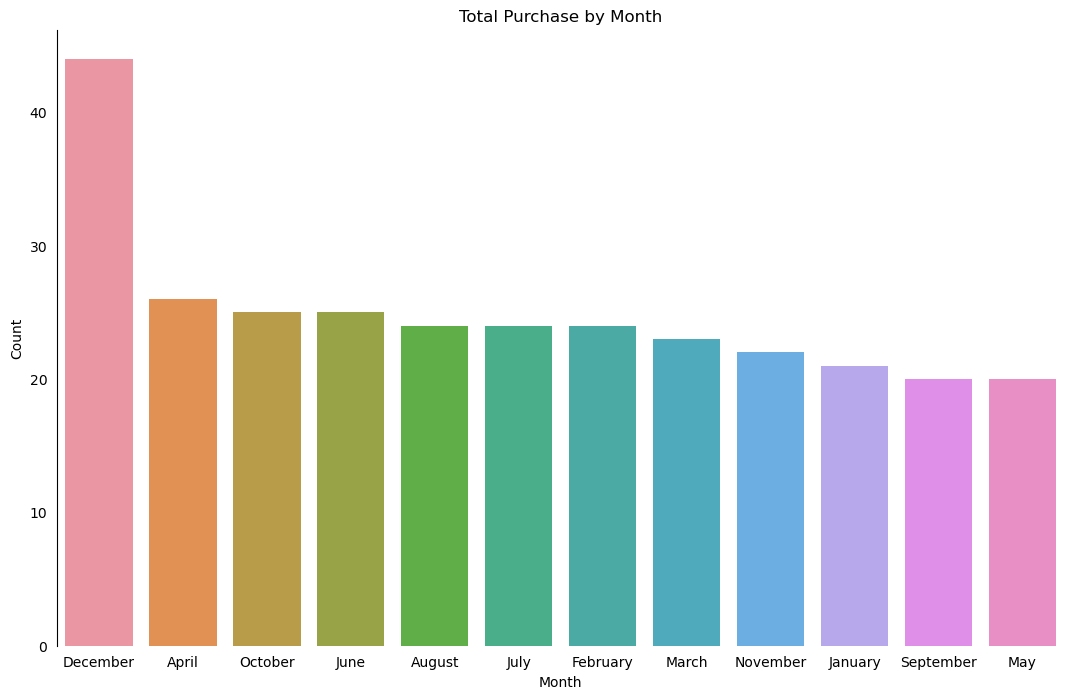

In [82]:
plt.figure(figsize=(13,8)) 

# Display the plot
sns.countplot(data= total_values, x='Month', order=total_values['Month'].value_counts().index)

# Customize the plot
plt.title('Total Purchase by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Heatmap

In the below heat map we know that the Totalsell feature depends mainly on the quantity of the product.

In [92]:
#We can use the Pandas method corr() to find the feature that is most correlated with TotalPurchase.
plt.figure(figsize=(10,5))
retail_data_sample = retail_metadata[["Quantity","UnitPrice","Total Amount"]]
corr = retail_data_sample.corr()
corr

,Quantity,UnitPrice,Total Amount
Quantity,1.000000,-0.004577,0.908873
UnitPrice,-0.004577,1.000000,0.081620
Total Amount,0.908873,0.081620,1.000000


<Figure size 1000x500 with 0 Axes>

In [93]:
# Aggregate the data
agg_data = retail_data_analysis.groupby(["Month","Country"]).agg({'Quantity':'sum','UnitPrice':'mean','Total Amount':'sum'}).reset_index()

In [94]:
# Pivot the data for heatmap
pivot_quantity = agg_data.pivot(index='Month',columns='Country',values='Quantity')
pivot_unitprice = agg_data.pivot(index='Month',columns='Country',values='UnitPrice')
pivot_total_amount = agg_data.pivot(index='Month',columns='Country',values='Total Amount')

In [95]:
# Plotting the heatmaps
plt.figure(figsize=(200,50))
sns.heatmap(pivot_quantity,annot=True,cmap='YlGnBu',cbar_kws={'label':'Quantity'})
plt.title('Heatmap of Total Quantity')
plt.show()

In [96]:
# Plotting the heatmaps
plt.figure(figsize=(200,50))
sns.heatmap(pivot_unitprice,annot=True,cmap='YlGnBu',cbar_kws={'label':'Unit Price'})
plt.title('Heatmap of Average Unit Price')
plt.show()

In [97]:
# Plotting the heatmaps
plt.figure(figsize=(200,50))
sns.heatmap(pivot_total_amount,annot=True,cmap='YlGnBu',cbar_kws={'label':'Total Amount'})
plt.title('Heatmap of Total Amount')
plt.show()

### Analyze the Sales Trends over Time

In [119]:
# Extract the day of the week from the 'InvoiceDate'
retail_data_analysis['Day'] = retail_data_analysis['InvoiceDate'].dt.day_name()

# Calculate total sales for each month
monthly_sales = total_values.loc[total_values.groupby('Year')['Total Amount'].idxmax()]

# Calculate total sales for each day of the week
daily_sales = retail_data_analysis.groupby('Day')['Total Amount'].sum()

# Identify busiest month of the year
busiest_month = monthly_sales['Month'].mode()[0]

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

Busiest Month (in terms of sells): December
Busiest Day of the Week (in terms of sales): Thursday


Text(0.5, 1.0, 'Sales Trend by Day of Week')

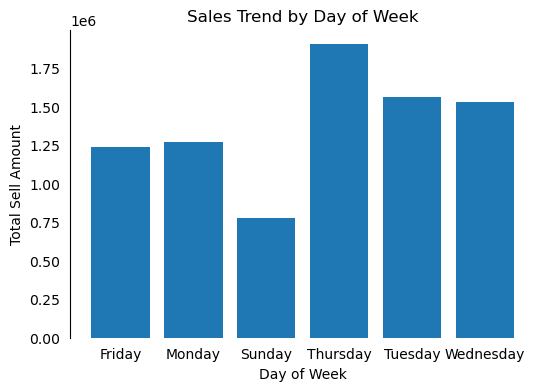

In [99]:
plt.figure(figsize=(6, 4))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sell Amount')
plt.title('Sales Trend by Day of Week')

### Who were the Best Customers Throughtout the Year?

In [100]:
# Calculate the total purchase amount for each customer
customer_total_purchase = retail_data.groupby('CustomerID')['Total Amount'].sum()

# Sort the customers based on the total purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Total Amount']).reset_index()

# Count the total number of customers
total_customers = retail_data['CustomerID'].nunique()

# Print the total number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerID'][:10]))

Among 4371 customers, the top 10 customers are: [14646, 18102, 17450, 14911, 12415, 14156, 17511, 16684, 13694, 15311]


### Top-selling Products and Countries

In [101]:
# Find most valualble Items in the list
items_total_sell = retail_data.groupby('Description')['Total Amount'].sum()

# Sort the items based on the total sells in ascending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Total Amount']).reset_index()

# Count the total number of items
total_items = retail_data['Description'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['Description'][:10]))

Among 3896 items, the 10 most valuable items are: ['REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'POSTAGE', 'ASSORTED COLOUR BIRD ORNAMENT', 'RABBIT NIGHT LIGHT', 'CHILLI LIGHTS', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'PICNIC BASKET WICKER 60 PIECES']


In [102]:
# Find country with most sells in the list
countrywise_sell = retail_data.groupby('Country')['Total Amount'].sum()

# Sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Total Amount']).reset_index()

# Count the total countries
total_countries = retail_data['Country'].nunique()

# Print the total countries and the top 10 countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))

Among 37 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


### Identify any Outliers or Anomalies in the Dataset

An outlier refers to a data point or a group of points that deviate significantly from the rest of the data. These outliers can be unusually high or low values. Detecting and handling outliers is crucial as they can adversely impact the accuracy of statistical models and analyses. Therefore, it is recommended to identify and remove outliers from the dataset. One effective technique for outlier detection is the Z-Score method.

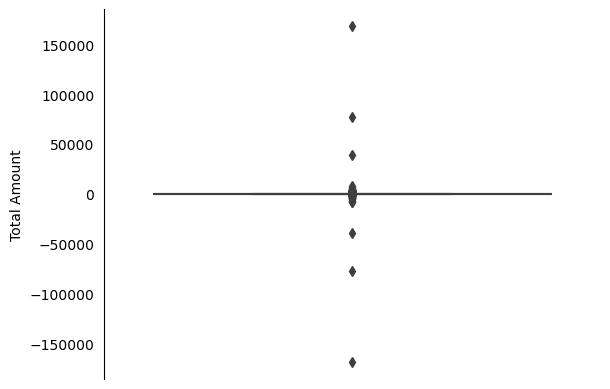

In [103]:
# Create a box plot
sns.boxplot(data=retail_data, y='Total Amount')

# Display the plot
plt.show()

###  Z-Score

The Z-Score measures how many standard deviations a data point is from the mean, beyond a threshold (e.g., Z-Score > 3) as potential outliers.

In [104]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(retail_data_analysis['Quantity'])
z_scores[z_scores > 3]

4850        7.239080
4945       11.458309
4946        5.544996
6365        5.704815
16427       3.834930
             ...    
534952      5.704815
537883      3.786984
540070      5.944544
540071      4.745900
540421    323.565346
Name: Quantity, Length: 170, dtype: float64

In [105]:
# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold
outlier_mask

# Extract outliers from the DataFrame
outliers = retail_data_analysis[outlier_mask]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total Amount
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,14:23:00,12,Thursday,2010,-280.8
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,16:48:00,12,Thursday,2010,1003.2
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,17:38:00,12,Thursday,2010,518.4
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,17:38:00,12,Thursday,2010,1484.0
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE,11:48:00,12,Friday,2010,230.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom,12:36:00,12,Thursday,2011,3254.4
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom,18:45:00,12,Thursday,2011,1080.0
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom,18:46:00,12,Thursday,2011,864.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,09:15:00,12,Friday,2011,168469.6


In [106]:
outliers.shape

(185, 13)

### Data without Outliers

In [107]:
# Remove outliers from the main dataset
without_outliers_online_retail = retail_data_analysis[~outlier_mask]

# Statistical Summary of data without outliers
without_outliers_online_retail.describe()


,Quantity,InvoiceDate,UnitPrice,Month,Year,Total Amount
count,401419.000000,401419,401419.000000,401419.000000,401419.000000,401419.000000
mean,11.655784,2011-07-10 12:23:07.174249728,3.475198,7.595612,2010.934388,20.151766
min,-720.000000,2010-12-01 08:26:00,0.000000,1.000000,2010.000000,-38970.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,5.000000,2011.000000,4.250000
50%,5.000000,2011-07-29 15:46:00,1.950000,8.000000,2011.000000,11.700000
75%,12.000000,2011-10-20 12:03:00,3.750000,11.000000,2011.000000,19.750000
max,760.000000,2011-12-09 12:50:00,38970.000000,12.000000,2011.000000,38970.000000
std,30.233618,NaN,69.780086,3.417307,0.247603,111.757165


In [108]:
retail_data_analysis.describe() # Statistical Summary of data with outliers

,Quantity,InvoiceDate,UnitPrice,Month,Year,Total Amount
count,401604.000000,401604,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,7.595407,2010.934378,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,1.000000,2010.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,5.000000,2011.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,8.000000,2011.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,11.000000,2011.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,12.000000,2011.000000,168469.600000
std,250.283037,NaN,69.764035,3.417451,0.247620,430.352218


 With Outliers (std = 250) and Without Outliers (std = 30)
 
The significant difference in standard deviation implies that the outliers have a substantial impact on the overall variability of the data. Removing the outliers has resulted in a more focused and less variable dataset

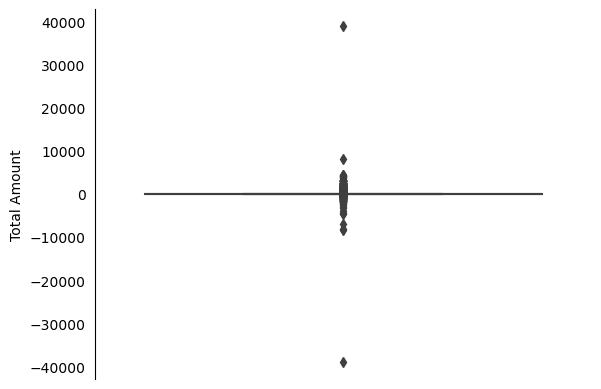

In [109]:
# Create a box plot of without_outliers_online_retail data
sns.boxplot(data=without_outliers_online_retail, y='Total Amount')

# Display the plot
plt.show()

 While considering the context of the data and the goals of the analysis we can not remove the outliers as it will have potential implications on the analysis. Here outliers might represents valuable or rare events that may carry essential information, which might impact the results of overall analysis.

In [110]:
retail_metadata.to_csv('retail_metadata.csv',index=False)